In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from vahun.tools import Timer
from vahun.corpus import Corpus
from vahun.tools import explog
from vahun.variational_autoencoder import Variational_autoencoder
from vahun.tools import show_performance

encode=10
dictsize=500000
popsize=1


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.gpu_options.per_process_gpu_memory_fraction=1
corp_path='/home/velkey/corp/webkorpusz.wpl'
corp=Corpus(corpus_path=corp_path,
            needed_corpus=["hun_lower"],
            language="Hun",size=dictsize,encoding_len=10)
database=corp.hun_lower
all_features=corp.featurize_data_charlevel_onehot(database)
train=all_features[0:int(len(all_features)*0.8)]
test=all_features[int(len(all_features)*0.8):len(all_features)]
x_train = train.reshape((len(train), np.prod(train.shape[1:])))
x_test = test.reshape((len(test), np.prod(test.shape[1:])))
print(x_train.shape)

logger=explog(encoder_type="variational_"+str(encode),
              encoding_dim=encode,feature_len=10,
              lang="Hun",unique_words=len(set(database)),
              name="demo_variational_"+str(encode),population_size=popsize,
              words=len(corp.hun_lower))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Corpus initalized, fields: ['hun_lower'] 
Unique words:  83241
(254464, 360)


In [2]:
encoder=Variational_autoencoder(logger=logger,tf_session=sess,
                         inputdim=360,
                         encoding_size=60,
                         optimizer =tf.train.AdamOptimizer(learning_rate = 0.001),
                         nonlinear=tf.sigmoid)
encoder.train(x_train,x_test,512,50)

 eredetibb 	  elegetbbb
   mélyebb 	    melyebb
      volt 	       holt
         a 	          a
legidősebb 	 feletésebb
       fiú 	         ik
  cholnoky 	    zalnogy
    viktor 	     niktor
         a 	          a
      nagy 	       nagy
 történetű 	  terténete
    magyar 	     magyar
     egyik 	      egyik
legnagyobb 	 fellagyobb
    alakja 	     alak a
       aki 	        ami
 mindössze 	  keltrssze
      évet 	       éget
       ért 	        ért
       meg 	        meg
     akkor 	      akkor
   végzett 	    kkszett
      vele 	       vele
        az 	         az
   ifjúkor 	     aokkor
       óta 	         ta
    gyötrő 	     nrktre
   tüdőbaj 	    tzoában
         ő 	          a
        is 	         is
 jogásznak 	  hálásznak
    indult 	     inyált
      mint 	       mint
       oly 	        oly
     sokan 	      sokan
         a 	          a
    magyar 	     magyar
         ő 	          a
       sem 	        sem
      lett 	       lett
       sem 	        sem
    ügyvéd 	    

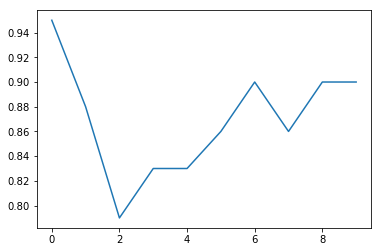

In [4]:
show_performance(encoder,x_test,corp,100)

        eh 	         em
    kecske 	     kersze
     kutya 	      két a
     aytuk 	      aétok
    macska 	     mans a
 árvíztűrő 	   ölsztera
      fúró 	       moró
     kacsa 	       aésa
         a 	          a
        és 	         és

Accuracy on data:  82.0 %


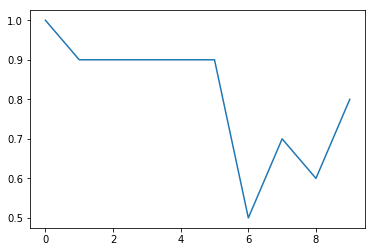

In [5]:
show_performance(encoder,["eh","kecske","kutya","aytuk","macska","árvíztűrő","fúró","kacsa","a","és"],corp)